<a href="https://colab.research.google.com/github/AbhaySingh71/machine_learning-for-ds-/blob/main/feature%20engineering/feature%20extraction/Linear_Discriminant_Analysis_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Discriminant Analysis in Machine Learning

When dealing with high-dimensional datasets, applying dimensionality reduction techniques is crucial to explore and model the data efficiently. In this article, we will discuss a powerful dimensionality reduction technique: Linear Discriminant Analysis (LDA). This technique is used to map high-dimensional data into a lower-dimensional space with minimal data loss.

## Table of Contents
- [What is Linear Discriminant Analysis?](#what-is-linear-discriminant-analysis)
- [Assumptions of LDA](#assumptions-of-lda)
- [How does LDA work?](#how-does-lda-work)
- [Python Code Implementation of LDA](#python-code-implementation-of-lda)
- [Advantages & Disadvantages of using LDA](#advantages--disadvantages-of-using-lda)
- [Applications of LDA](#applications-of-lda)

## What is Linear Discriminant Analysis?
Linear Discriminant Analysis (LDA), also known as **Normal Discriminant Analysis** or **Discriminant Function Analysis**, is a dimensionality reduction technique primarily used in supervised classification problems. LDA facilitates the modeling of distinctions between groups by effectively separating two or more classes. It projects features from a higher-dimensional space into a lower-dimensional space.

In machine learning, LDA is a supervised learning algorithm tailored for classification tasks. Its goal is to identify a linear combination of features that optimally segregates the classes within a dataset.

For example, imagine we have two classes, each with multiple features. Using a single feature to classify them may result in overlapping, as shown in the figure below. Therefore, more features are needed for proper classification.


# Assumptions of LDA
LDA assumes the following conditions for the data:
- The data has a **Gaussian distribution**.
- The covariance matrices of the different classes are **equal**.
- The data is **linearly separable**, meaning a linear decision boundary can classify the classes effectively.

### Example:
Suppose we have two sets of data points belonging to two different classes that we want to classify. When plotted on a 2D graph, there might not be a straight line that can separate the classes completely. In this case, **LDA** is used to reduce the 2D graph into a 1D graph to maximize separability between the two classes.

### Linearly Separable Dataset:
LDA uses both the X and Y axes to create a new axis that maximizes the separation of the two categories. This process reduces the 2D graph to a 1D graph.

### Criteria Used by LDA to Create a New Axis:
1. **Maximize the distance** between the means of the two classes.
2. **Minimize the variation** within each class.

In the graph below, a new axis (in red) is generated to maximize the distance between the means of the two classes and minimize the variation within each class. This newly generated axis increases the separation between the data points. After the new axis is generated, all data points are plotted on it, as shown below.

### When LDA Fails:
LDA fails when the mean of the distributions is shared, making it impossible to find a new axis that separates the classes linearly. In such cases, **non-linear discriminant analysis** is used.

## How Does LDA Work?
LDA works by projecting the data onto a lower-dimensional space that maximizes the separation between the classes. It does this by finding a set of linear discriminants that maximize the ratio of **between-class variance** to **within-class variance**. In simpler terms, LDA finds the directions in the feature space that best separate the different classes of data.

## Mathematical Intuition Behind LDA:
Let’s assume two classes with d-dimensional samples \(x_1, x_2, ..., x_n\), where:
- \(n_1\) samples belong to class \(c_1\) and \(n_2\) samples belong to class \(c_2\).
- The projection of a data point \(x_i\) on a line represented by the unit vector \(v\) can be written as \(v^T x_i\).

Let:
- \(μ_1\) and \(μ_2\) be the means of samples from classes \(c_1\) and \(c_2\) before projection.
- \(μ_1^{\sim}\) and \(μ_2^{\sim}\) represent the means after projection, calculated as:

\[
μ_1^{\sim} = v^T μ_1
\]
\[
μ_2^{\sim} = v^T μ_2
\]

### Objective of LDA:
Maximize the separation between the means \( |μ_1^{\sim} - μ_2^{\sim}| \) and minimize the scatter within each class. The scatter for class \(c_1\) is given by:

\[
s_1^2 = \sum_{y_i \in c_1} (y_i - μ_1)^2
\]

### Maximize the Ratio:
To achieve the best linear separation, LDA maximizes the following ratio:

\[
J(v) = \frac{|μ_1^{\sim} - μ_2^{\sim}|}{s_1^2 + s_2^2} = \frac{v^T S_b v}{v^T S_w v}
\]

Where:
- \(S_b\) is the **between-class scatter** matrix.
- \(S_w\) is the **within-class scatter** matrix.

### Solution:
Maximizing \(J(v)\) gives us the direction of \(v\) that best separates the classes. The optimal solution corresponds to the largest eigenvalue of the matrix \(M = S_w^{-1} S_b\).

## Extensions to LDA:
- **Quadratic Discriminant Analysis (QDA)**: Each class uses its own estimate of variance.
- **Flexible Discriminant Analysis (FDA)**: Non-linear combinations of inputs are used.
- **Regularized Discriminant Analysis (RDA)**: Introduces regularization into the estimate of the variance.

## Python Code Implementation of LDA:
In this implementation, we will perform Linear Discriminant Analysis using the Scikit-learn library on the Iris dataset.


Accuracy : 1.0
[[10  0  0]
 [ 0  8  0]
 [ 0  0 12]]


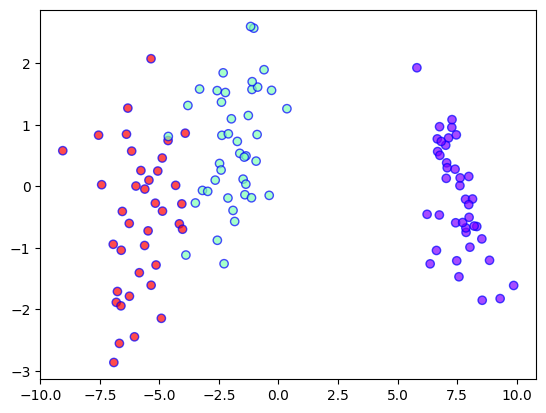

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# load the iris dataset
iris = load_iris()
dataset = pd.DataFrame(columns=iris.feature_names,
                       data=iris.data)
dataset['target'] = iris.target

# divide the dataset into class and target variable
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

# Preprocess the dataset and divide into train and test
sc = StandardScaler()
X = sc.fit_transform(X)
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test,\
    y_train, y_test = train_test_split(X, y,
                                       test_size=0.2)

# apply Linear Discriminant Analysis
lda = LinearDiscriminantAnalysis(n_components=2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

# plot the scatterplot
plt.scatter(
    X_train[:, 0], X_train[:, 1],
    c=y_train,
    cmap='rainbow',
    alpha=0.7, edgecolors='b'
)

# classify using random forest classifier
classifier = RandomForestClassifier(max_depth=2,
                                    random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

# print the accuracy and confusion matrix
print('Accuracy : ' + str(accuracy_score(y_test, y_pred)))
conf_m = confusion_matrix(y_test, y_pred)
print(conf_m)